In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# leer el archivo CSV

strava_javier = pd.read_csv(r"C:\Users\eduar\OneDrive\Escritorio\Master_DataScience_AI\TFM. “Predicción del rendimiento en corredores mediante técnicas de Machine Learning un enfoque aplicado al sector deportivo”\data\activities_javier_monterde.csv")

# mostrar las primeras filas del DataFrame

strava_javier.head()

,ID de actividad,Fecha de la actividad,Nombre de la actividad,Tipo de actividad,Descripción de la actividad,Tiempo transcurrido,Distancia,Ritmo cardiaco máximo,Esfuerzo Relativo,Desplazamiento,...,Intensidad,Ritmo ajustado en pendientes promedio,Tiempo cronometrado,Ciclos en total,Recuperación,Con mascota,Competición,Carrera de larga distancia,Por una causa,Multimedia
0,8117654864,3 sept. 2022 9:41:32,Riglos con la nena 👩🏼‍❤️‍💋‍👨🏻🧗🏻😎💗,Caminata,NaN,11659,"6,72",NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,media/FF211E06-9492-4687-8867-285AF9509432.jpg
1,8117654924,1 nov. 2022 9:12:09,Pico Oturia desde Javierre (1ºintento),Caminata,NaN,19997,"11,96",NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,media/D66AD0F1-59BD-4B5C-A1BF-E5F169314DB5.jpg...
2,8123277835,15 nov. 2022 18:13:26,Primer ruedo de Strava,Carrera,NaN,1580,"4,37",NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8132608447,17 nov. 2022 18:40:34,Vueltecicas en el parque del agua,Carrera,NaN,2015,"5,60",NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8159265244,23 nov. 2022 19:19:26,Tío Jorge x3,Carrera,NaN,1944,"5,34",NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
strava_javier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 99 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   ID de actividad                                        211 non-null    int64  
 1   Fecha de la actividad                                  211 non-null    object 
 2   Nombre de la actividad                                 211 non-null    object 
 3   Tipo de actividad                                      211 non-null    object 
 4   Descripción de la actividad                            48 non-null     object 
 5   Tiempo transcurrido                                    211 non-null    int64  
 6   Distancia                                              211 non-null    object 
 7   Ritmo cardiaco máximo                                  0 non-null      float64
 8   Esfuerzo Relativo                                 

In [4]:
# variable distancia a float
strava_javier['Distancia'] = strava_javier['Distancia'].replace(',', '.', regex=True).astype(float)

In [5]:
strava_javier.head()

,ID de actividad,Fecha de la actividad,Nombre de la actividad,Tipo de actividad,Descripción de la actividad,Tiempo transcurrido,Distancia,Ritmo cardiaco máximo,Esfuerzo Relativo,Desplazamiento,...,Intensidad,Ritmo ajustado en pendientes promedio,Tiempo cronometrado,Ciclos en total,Recuperación,Con mascota,Competición,Carrera de larga distancia,Por una causa,Multimedia
0,8117654864,3 sept. 2022 9:41:32,Riglos con la nena 👩🏼‍❤️‍💋‍👨🏻🧗🏻😎💗,Caminata,NaN,11659,6.72,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,media/FF211E06-9492-4687-8867-285AF9509432.jpg
1,8117654924,1 nov. 2022 9:12:09,Pico Oturia desde Javierre (1ºintento),Caminata,NaN,19997,11.96,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,media/D66AD0F1-59BD-4B5C-A1BF-E5F169314DB5.jpg...
2,8123277835,15 nov. 2022 18:13:26,Primer ruedo de Strava,Carrera,NaN,1580,4.37,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8132608447,17 nov. 2022 18:40:34,Vueltecicas en el parque del agua,Carrera,NaN,2015,5.60,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8159265244,23 nov. 2022 19:19:26,Tío Jorge x3,Carrera,NaN,1944,5.34,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
print(strava_javier['Tipo de actividad'].value_counts())
print(strava_javier['Fecha de la actividad'].min(), strava_javier['Fecha de la actividad'].max())

Tipo de actividad
Carrera          179
Caminata          22
Senderismo         3
Bicicleta          3
Entrenamiento      2
Surf de remo       1
Snowboard          1
Name: count, dtype: int64
1 abr. 2025 18:33:34 9 sept. 2025 19:15:12


In [7]:
def limpiar_strava(df):
    # Renombrar columnas para facilitar el manejo
    df = df.rename(columns={
        'Fecha de la actividad': 'activity_date',
        'Tipo de actividad': 'activity_type',
        'Nombre de la actividad': 'activity_name',
        'Distancia': 'distance',
        'Tiempo transcurrido': 'elapsed_time',
        'Velocidad promedio': 'average_speed',
        'Desnivel positivo': 'elevation_gain',
        'Ritmo cardiaco promedio': 'avg_heart_rate',
        'Ritmo cardiaco máximo': 'max_heart_rate',
        'Calorías': 'calories',
        'Cadencia promedio': 'avg_cadence',
        'ID de actividad': 'activity_id',
    })

    # Mapeo de meses en español a inglés
    meses_esp = {
        'ene.': 'Jan', 'feb.': 'Feb', 'mar.': 'Mar', 'abr.': 'Apr',
        'may.': 'May', 'jun.': 'Jun', 'jul.': 'Jul', 'ago.': 'Aug',
        'sep.': 'Sep', 'sept.': 'Sep', 'oct.': 'Oct', 'nov.': 'Nov', 'dic.': 'Dec'
    }

    # Transformar fechas
    df['activity_date_temp'] = df['activity_date'].astype(str)
    for esp, eng in meses_esp.items():
        df['activity_date_temp'] = df['activity_date_temp'].str.replace(esp, eng, regex=False)

    # Convertir fechas
    df['activity_date'] = pd.to_datetime(df['activity_date_temp'], format='%d %b %Y %H:%M:%S', errors='coerce')
    df = df.drop('activity_date_temp', axis=1)

    df = df[(df['activity_date'].dt.year >= 2024) & (df['activity_type'] == 'Carrera')]

    if df['distance'].max() > 1000:
        df['distance_km'] = df['distance'] / 1000
    else:
        df['distance_km'] = df['distance']

    # Calcular el ritmo promedio en segundos por km
    df['avg_pace_s_per_km'] = df['elapsed_time'] / df['distance_km']

    # Calcular el ritmo en minutos por km
    df['minutes_per_km'] = df['avg_pace_s_per_km'] / 60

    # Función simple para formatear ritmo
    def format_pace(minutes_per_km):
        if pd.isna(minutes_per_km) or minutes_per_km <= 0 or np.isinf(minutes_per_km):
            return "N/A"
        minutes = int(minutes_per_km)
        seconds = int(round((minutes_per_km - minutes) * 60))
        if seconds == 60:
            minutes += 1
            seconds = 0
        return f"{minutes}.{seconds:02d}"

    # Aplicar formato de ritmo
    df['pace_formatted'] = df['minutes_per_km'].apply(format_pace)
    # cambiarla a float
    df['pace_formatted'] = df['pace_formatted'].replace("N/A", np.nan).astype(float)

    # Nueva columna: elapsed_time en formato hh:mm:ss (sin días)
    df['elapsed_time_hms'] = pd.to_timedelta(df['elapsed_time'], unit='s').apply(lambda x: f"{int(x.total_seconds() // 3600):02}:{int((x.total_seconds() % 3600) // 60):02}:{int(x.total_seconds() % 60):02}")

    # Seleccionar solo las columnas relevantes
    columnas = [
        'activity_id', 'activity_date', 'activity_type',
        'distance_km','elapsed_time_hms',
        'pace_formatted','elevation_gain', 'avg_cadence','avg_heart_rate', 'max_heart_rate', 'calories'
    ]
    df = df[columnas]

    return df

strava_limpio = limpiar_strava(strava_javier)

In [8]:
# añadir columna de usuario

strava_limpio['user'] = 'Javier Monterde'

In [9]:
strava_limpio.tail()

,activity_id,activity_date,activity_type,distance_km,elapsed_time_hms,pace_formatted,elevation_gain,avg_cadence,avg_heart_rate,max_heart_rate,calories,user
206,15675981177,2025-09-02 18:38:27,Carrera,6.82,00:52:12,7.39,46.0,78.0,NaN,NaN,594.0,Javier Monterde
207,15698671001,2025-09-04 18:34:17,Carrera,7.09,00:57:55,8.10,9.0,79.0,NaN,NaN,656.0,Javier Monterde
208,15756347830,2025-09-09 18:33:40,Carrera,2.16,00:25:57,12.01,16.0,78.0,NaN,NaN,236.0,Javier Monterde
209,15756352282,2025-09-09 19:15:12,Carrera,2.18,00:13:18,6.06,10.0,79.0,NaN,NaN,174.0,Javier Monterde
210,15756352409,2025-09-09 19:01:32,Carrera,1.29,00:05:01,3.53,0.0,85.0,NaN,NaN,75.0,Javier Monterde


In [10]:
# Guardar el DataFrame limpio en la carpeta csv_clean
strava_limpio.to_csv(r"C:\Users\eduar\OneDrive\Escritorio\Master_DataScience_AI\TFM. “Predicción del rendimiento en corredores mediante técnicas de Machine Learning un enfoque aplicado al sector deportivo”\csv_clean\strava_javier_monterde_limpio.csv", index=False)

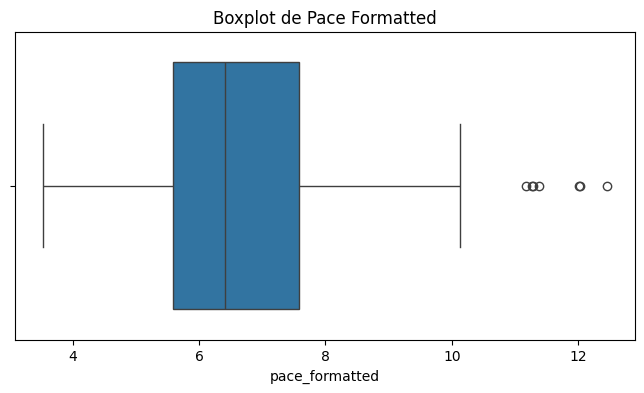

In [11]:
# comprobar outliers pace_formatted
plt.figure(figsize=(8, 4))
sns.boxplot(x=strava_limpio['pace_formatted'])
plt.title('Boxplot de Pace Formatted')
plt.show()

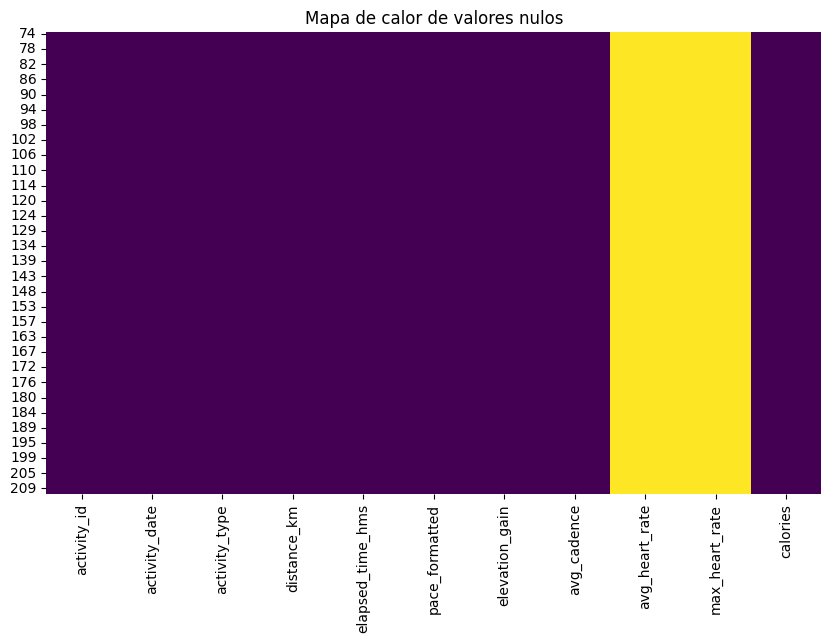

Estadísticos de variables seleccionadas:
       distance_km  pace_formatted     calories
count   122.000000      122.000000   122.000000
mean      7.623689        6.979426   660.270492
std       2.564519        1.765111   194.029010
min       0.760000        3.530000    75.000000
25%       6.085000        5.590000   584.000000
50%       7.655000        6.415000   665.500000
75%       8.580000        7.587500   733.250000
max      20.270000       12.450000  1573.000000


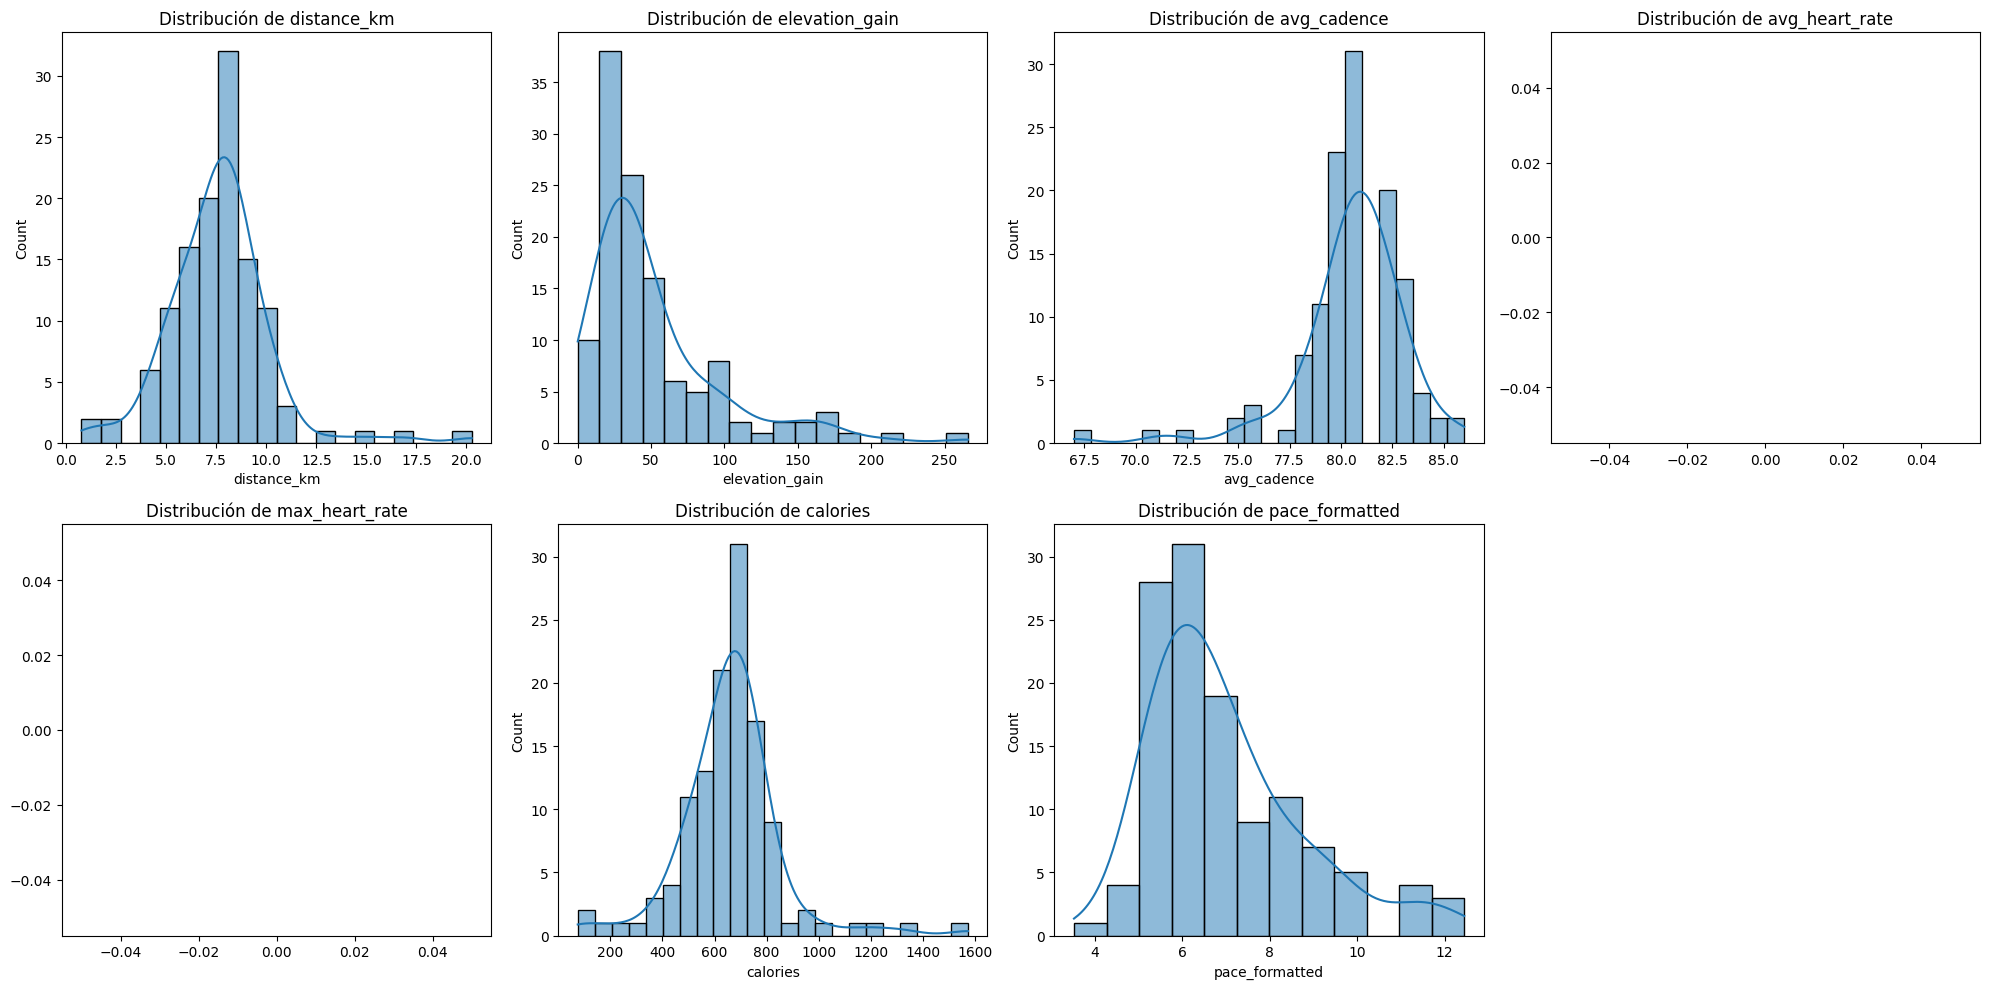

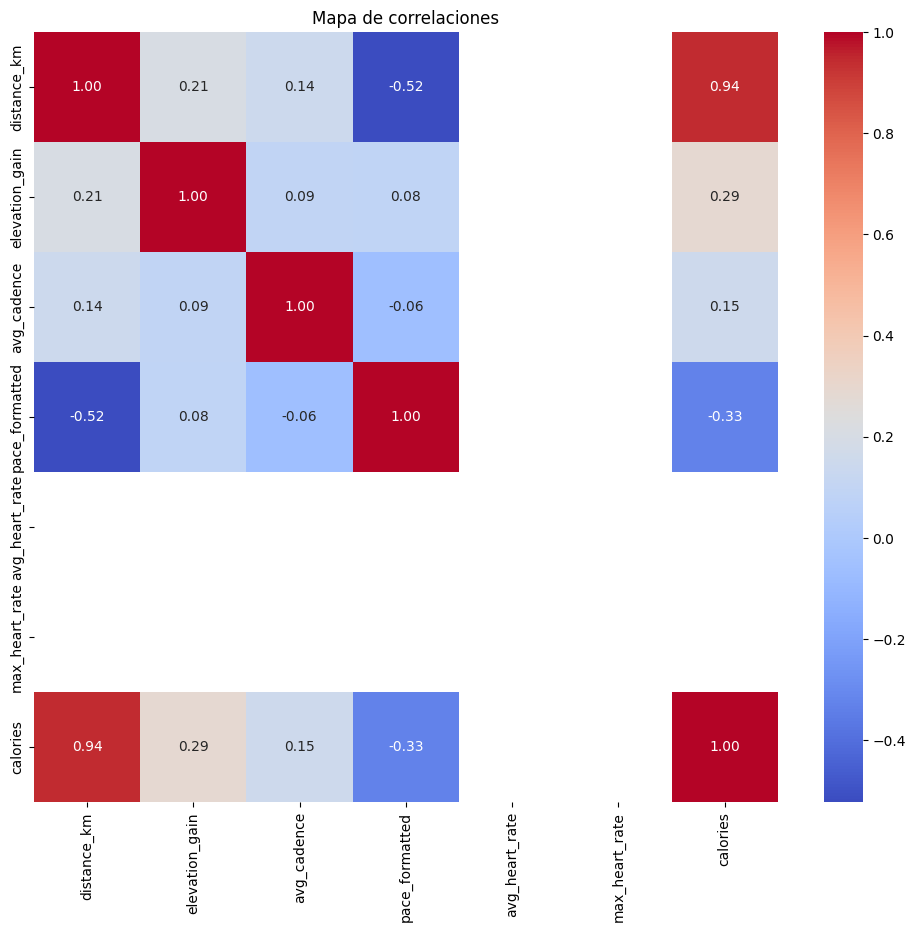

In [12]:
def EDA(data):
    # Seleccionar solo las columnas relevantes
    columnas = [
        'activity_id', 'activity_date', 'activity_type',
        'distance_km', 'elapsed_time_hms',
        'pace_formatted', 'elevation_gain', 'avg_cadence',
        'avg_heart_rate', 'max_heart_rate', 'calories'
    ]
    data = data[columnas]

    # Gráficos para ver nulos
    if data.isnull().sum().sum() == 0:
        print("No hay valores nulos en las variables seleccionadas.")
    else:
        plt.figure(figsize=(10,6))
        sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
        plt.title('Mapa de calor de valores nulos')
        plt.show()

    # Estadísticos de variables seleccionadas
    print("Estadísticos de variables seleccionadas:")
    print(data[['distance_km', 'pace_formatted', 'calories']].describe())

    # Distribución de variables continuas en una sola imagen
    dist_vars = ['distance_km', 'elevation_gain', 'avg_cadence', 'avg_heart_rate', 'max_heart_rate', 'calories', 'pace_formatted']
    fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
    axes = axes.flatten()

    for i, var in enumerate(dist_vars):
        if i < len(axes):
            ax = axes[i]
            if data[var].dtype == 'object':
                data[var].value_counts().plot(kind='bar', ax=ax)
                ax.set_ylabel('Frecuencia')
            else:
                sns.histplot(data[var].dropna(), kde=True, ax=ax)
            ax.set_title(f'Distribución de {var}')

    # Eliminar el subplot vacío si hay menos variables que subplots
    for j in range(len(dist_vars), len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

    # Mapa de correlaciones (todas las variables numéricas relevantes)
    plt.figure(figsize=(12,10))
    corr_vars = ['distance_km', 'elevation_gain', 'avg_cadence','pace_formatted', 'avg_heart_rate', 'max_heart_rate', 'calories']
    corr = data[corr_vars].corr()
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
    plt.title('Mapa de correlaciones')
    plt.show()

EDA(strava_limpio)
